In [87]:
#import required libraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [88]:
df=pd.read_csv("C:\COE\Clustering\Mall_Customers.csv")

In [89]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [91]:
df.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [92]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


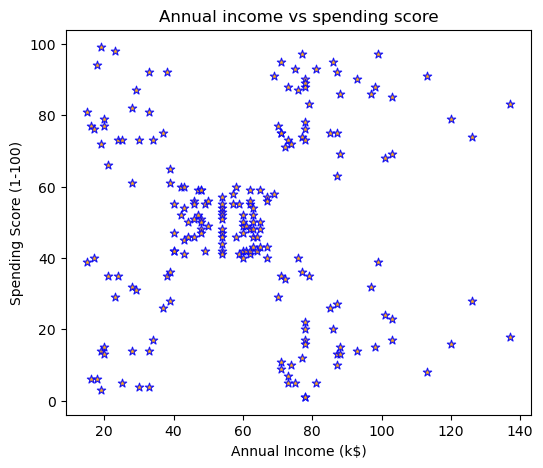

In [93]:
#EDA
#annual income vs spending score using scatter plot 
plt.figure(figsize=(6,5))

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,color='orange',edgecolors='blue',alpha=0.9,linewidths=0.8,marker='*',s=40)
plt.title("Annual income vs spending score")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

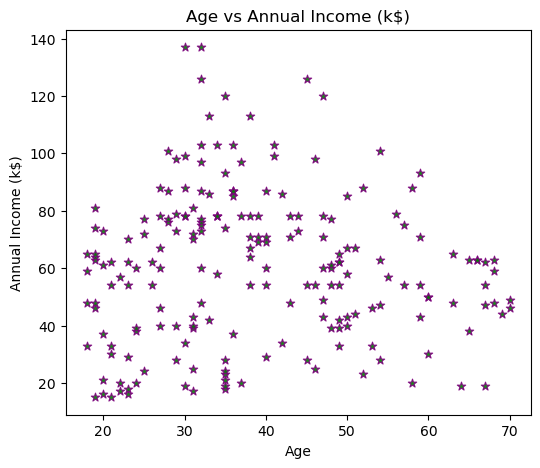

In [94]:
plt.figure(figsize=(6,5))

sns.scatterplot(x='Age',y='Annual Income (k$)',data=df,color='green',edgecolors='purple',alpha=0.9,linewidths=0.8,marker='*',s=40)
plt.title("Age vs Annual Income (k$)")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [95]:
# Feature engineering 
#standardscaler

from sklearn.preprocessing import StandardScaler

#load the models

scaler=StandardScaler()

#fit model
scale_data=scaler.fit_transform(df)


In [96]:
print(scale_data)

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -1.4053405 ]
 [-0.70690189 -1.24279661

In [97]:
#convert scaled_data array into dataframe
df=pd.DataFrame(scale_data,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])#can be written as" df=pd.DataFrame(scale_data,columns=data.columns)"

In [98]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [99]:
#train the model 
from sklearn.cluster import KMeans

#Load the model 
model=KMeans(n_clusters=4, random_state = 42)

#train the model 
model.fit(df)

#display the label 
model.labels_



c:\Users\PAmre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [101]:
df['cluster']=model.labels_

In [102]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,2
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [103]:
df['cluster'].value_counts()

cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64

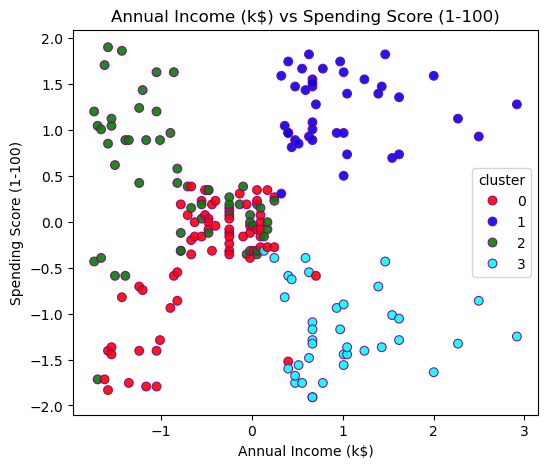

In [104]:
plt.figure(figsize=(6,5))
colors=['red','blue','green','cyan']

sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',data=df,palette=colors,edgecolors='purple',alpha=0.9,linewidths=0.8,s=40)
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

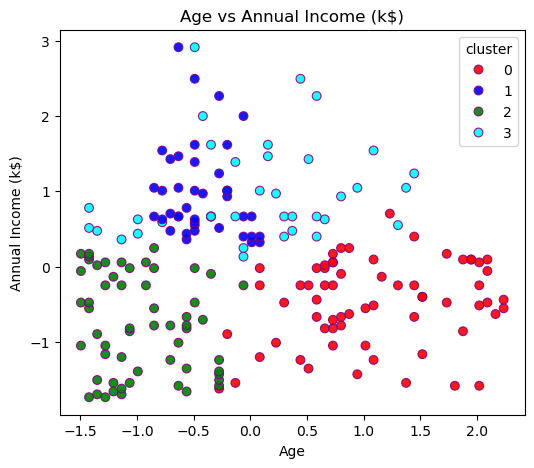

In [105]:
plt.figure(figsize=(6,5))
colors=['red','blue','green','cyan']

sns.scatterplot(x='Age',y='Annual Income (k$)',hue='cluster',data=df,palette=colors,edgecolors='purple',alpha=0.9,linewidths=0.8,s=40)
plt.title("Age vs Annual Income (k$)")
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [106]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'cluster'], dtype='object')

In [107]:
x=df.iloc[:,0:3]
y=df['cluster']

In [108]:
x

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [109]:
y

0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    3
197    1
198    3
199    1
Name: cluster, Length: 200, dtype: int32

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [111]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [112]:
y_pred=classifier.predict(x_test)

0.95


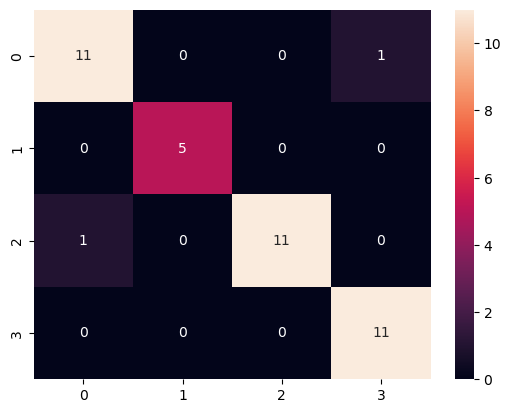

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print(accuracy_score(y_test,y_pred))

c:\Users\PAmre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PAmre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PAmre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\PAmre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

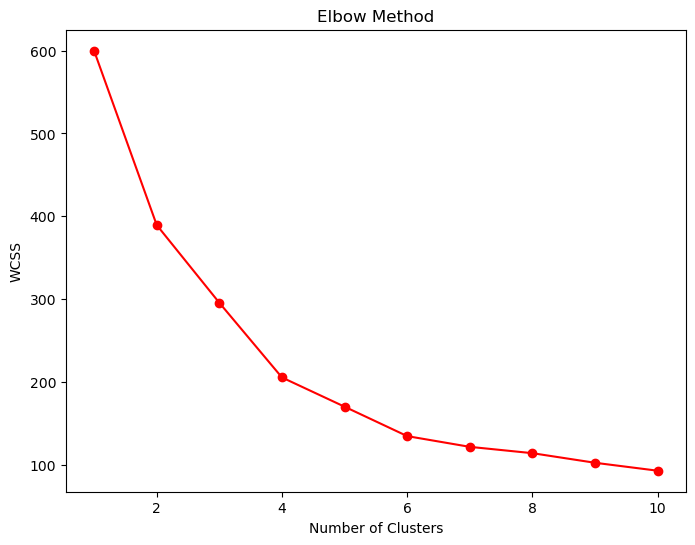

In [114]:

# check with ELBow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop("cluster", axis=1))
    wcss.append(kmeans.inertia_)
 
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker="o",color="red")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [115]:
#save the model
import joblib
joblib.dump(classifier,'random_forest_model.pkl')

['random_forest_model.pkl']

In [116]:
#save the dataset
df.to_csv('Clusteres_data.csv',index=False)

In [117]:
#saved the k-mean model
joblib.dump(model,'kmeans_model.pkl')

['kmeans_model.pkl']